# Perform Exploratory Data Analysis on the images

In [22]:
# Import statements
import seaborn as sns #data viz
import os #python os framework
import random #random choice
from PIL import Image #Perform some image manipulations
import numpy as np #numpy array manipulations
import cv2 #opencv 
import matplotlib.pyplot as plt #data viz library
import pandas as pd #dataframe library

In [23]:
#print working directory of t
cwd = os.getcwd()
cwd

'c:\\Users\\aaron\\OneDrive\\Desktop\\pneumonia_image_classification\\notebooks'

### Data Visualisation for Normal Images (train dataset)

In [24]:
# Set Data Path to train dataset for NORMAL x-rays
DATA_PATH_NORMAL = r"..\data\raw\train\NORMAL"

#Retrieve the full path for one random x-ray image
images_list_stem = os.listdir(DATA_PATH_NORMAL)
selected_image_stem = random.choice(images_list_stem)
selected_image_path = os.path.join(DATA_PATH_NORMAL,f"{selected_image_stem}")

#Use pillow library to visualize the image
img = Image.open(selected_image_path)
img.show()

In [25]:
# For sanity check, print the type of img var
type(img)

PIL.JpegImagePlugin.JpegImageFile

### cv2 has flag set to **cv2.IMREAD_COLOR** RGB but pil automatically loads in **grayscale x-ray** 

In [26]:
#Shape of pillow image
img_arr = np.array(img)
img_arr.shape

(1352, 1510)

(1352, 1510, 3)


(-0.5, 1509.5, 1351.5, -0.5)

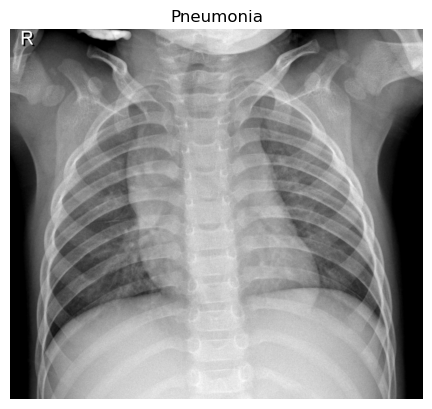

In [27]:
#Shape of Opencv image
img_arr = cv2.imread(os.path.join(DATA_PATH_NORMAL, f"{selected_image_stem}"))
print(img_arr.shape)
plt.imshow(img_arr)
plt.title("Pneumonia")
plt.axis(False)


In [28]:
#For sanity check, print the type of img_arr var
type(img_arr)

numpy.ndarray

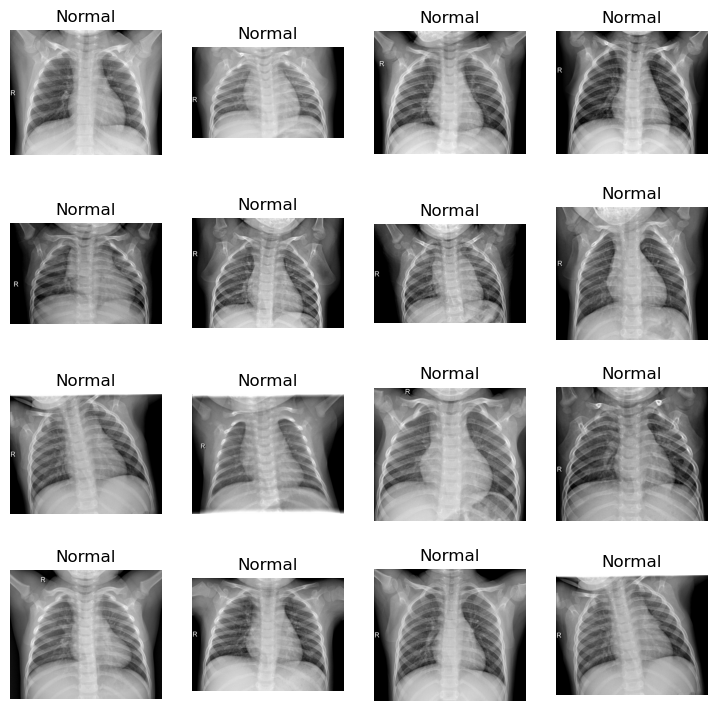

In [29]:
#Plot more images
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for image_i in range(1, rows*cols + 1):
    #Retrieve the full path for one random x-ray image
    images_list_stem = os.listdir(DATA_PATH_NORMAL)
    selected_image_stem = random.choice(images_list_stem)
    selected_image_path = os.path.join(DATA_PATH_NORMAL,f"{selected_image_stem}")
    fig.add_subplot(rows,cols,image_i)

    img_arr = cv2.imread(os.path.join(DATA_PATH_NORMAL, f"{selected_image_stem}"))
    plt.imshow(img_arr)
    plt.title("Normal")
    plt.axis(False)

### Data Visualisation for Pneumonia Images (train dataset)

(648, 976, 3)


(-0.5, 975.5, 647.5, -0.5)

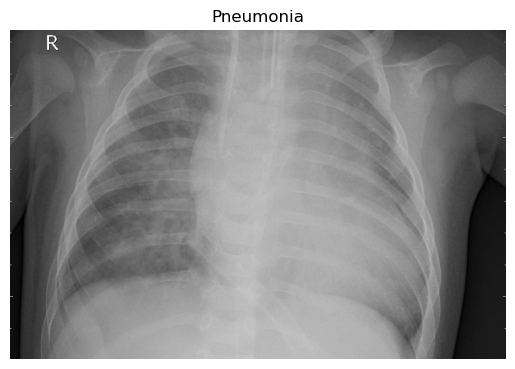

In [30]:
# Set Data Path to train dataset for NORMAL x-rays
DATA_PATH_PNEUMONIA = r"..\data\raw\train\PNEUMONIA"

#Retrieve the full path for one random x-ray image
images_list_stem = os.listdir(DATA_PATH_PNEUMONIA)
selected_image_stem = random.choice(images_list_stem)
selected_image_path = os.path.join(DATA_PATH_PNEUMONIA,f"{selected_image_stem}")

#Shape of Opencv image
img_arr = cv2.imread(os.path.join(DATA_PATH_PNEUMONIA, f"{selected_image_stem}"))
print(img_arr.shape)
plt.imshow(img_arr)
plt.title("Pneumonia")
plt.axis(False)

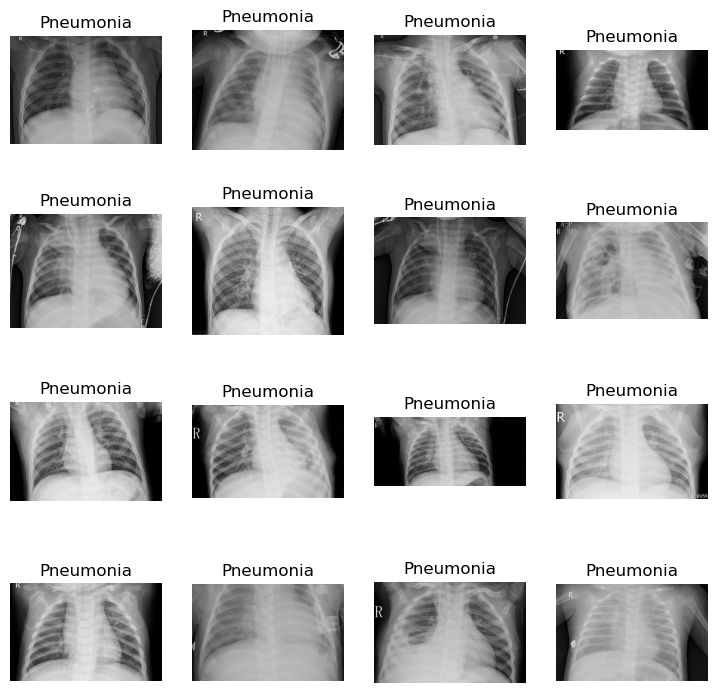

In [31]:
#Plot more images
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for image_i in range(1, rows*cols + 1):
    #Retrieve the full path for one random x-ray image
    images_list_stem = os.listdir(DATA_PATH_PNEUMONIA)
    selected_image_stem = random.choice(images_list_stem)
    selected_image_path = os.path.join(DATA_PATH_PNEUMONIA,f"{selected_image_stem}")
    fig.add_subplot(rows,cols,image_i)

    img_arr = cv2.imread(os.path.join(DATA_PATH_PNEUMONIA, f"{selected_image_stem}"))
    plt.imshow(img_arr)
    plt.title("Pneumonia")
    plt.axis(False)

### The shapes of all images are different as evident from the above codes. Some of the resolutions can be quite high as well, increasing computational time for deep learning models in the later stages of the model. Look into **resizing of the models** and **grayscale conversion**, especially when using cv2 framework considering that x-rays are grayscale without colors. 

### Visualise the labels (target) distribution for all combined dataset

In [32]:
# Set Data Path to data directory
DATA_PATH_PNEUMONIA = r"..\data\raw"

#Initialise count variables
normal_count = 0
pneumonia_count = 0
labels = ["NORMAL","PNEUMONIA"]
dataset_type = ["train","val","test"]

#Iterate through the dataset (train,test,val) and then classification(NORMAL,PNEUMONIA)
for dataset in dataset_type:
    dataset_path = os.path.join(DATA_PATH_PNEUMONIA,f"{dataset}")
    for label in labels:
        print(dataset_path)
        dataset_path_in = os.path.join(dataset_path,f"{label}")
        number_images = len(os.listdir(dataset_path_in))
        if label == "NORMAL":
            normal_count += number_images
        elif label == "PNEUMONIA":
            pneumonia_count += number_images

print(f"Number of normal cases: {normal_count}")
print(f"Number of pneuominia cases: {pneumonia_count}")

#Represent as pandas series
data = {'Normal': normal_count, 'Pneumonia': pneumonia_count}
data = pd.Series(data=data,index=["Normal","Pneumonia"])

..\data\raw\train
..\data\raw\train
..\data\raw\val
..\data\raw\val
..\data\raw\test
..\data\raw\test
Number of normal cases: 1583
Number of pneuominia cases: 4273


<Axes: >

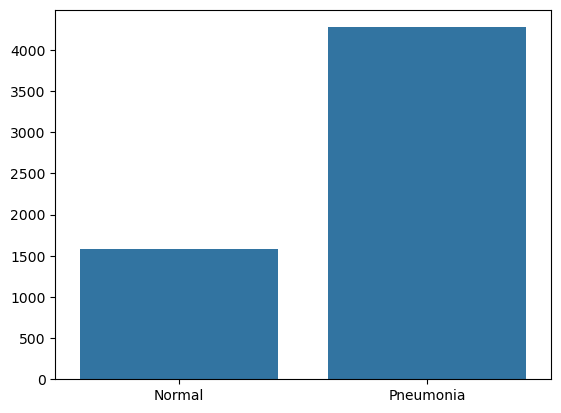

In [33]:
sns.barplot(data=data)

### Visualise the target distribution for the train + validation dataset

In [34]:
# Set Data Path to data directory
DATA_PATH_PNEUMONIA = r"..\data\raw"

#Initialise count variables
normal_count = 0
pneumonia_count = 0
labels = ["NORMAL","PNEUMONIA"]
dataset_type = ["train","val"]

#Iterate through the dataset (train,test,val) and then classification(NORMAL,PNEUMONIA)
for dataset in dataset_type:
    dataset_path = os.path.join(DATA_PATH_PNEUMONIA,f"{dataset}")
    for label in labels:
        print(dataset_path)
        dataset_path_in = os.path.join(dataset_path,f"{label}")
        number_images = len(os.listdir(dataset_path_in))
        if label == "NORMAL":
            normal_count += number_images
        elif label == "PNEUMONIA":
            pneumonia_count += number_images

print(f"Number of normal cases: {normal_count}")
print(f"Number of pneuominia cases: {pneumonia_count}")

#Represent as pandas series
data = {'Normal': normal_count, 'Pneumonia': pneumonia_count}
data = pd.Series(data=data,index=["Normal","Pneumonia"])

..\data\raw\train
..\data\raw\train
..\data\raw\val
..\data\raw\val
Number of normal cases: 1349
Number of pneuominia cases: 3883


<Axes: >

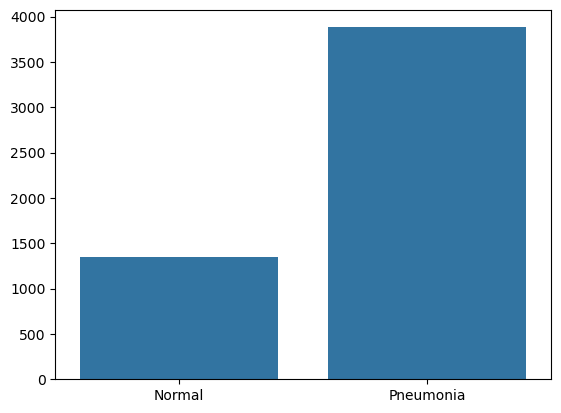

In [35]:
sns.barplot(data=data)

### Visualise the target distribution for the test set

In [36]:
# Set Data Path to data directory
DATA_PATH_PNEUMONIA = r"..\data\raw"

#Initialise count variables
normal_count = 0
pneumonia_count = 0
labels = ["NORMAL","PNEUMONIA"]
dataset_type = ["test"]

#Iterate through the dataset (train,test,val) and then classification(NORMAL,PNEUMONIA)
for dataset in dataset_type:
    dataset_path = os.path.join(DATA_PATH_PNEUMONIA,f"{dataset}")
    for label in labels:
        print(dataset_path)
        dataset_path_in = os.path.join(dataset_path,f"{label}")
        number_images = len(os.listdir(dataset_path_in))
        if label == "NORMAL":
            normal_count += number_images
        elif label == "PNEUMONIA":
            pneumonia_count += number_images

print(f"Number of normal cases: {normal_count}")
print(f"Number of pneuominia cases: {pneumonia_count}")

#Represent as pandas series
data = {'Normal': normal_count, 'Pneumonia': pneumonia_count}
data = pd.Series(data=data,index=["Normal","Pneumonia"])

..\data\raw\test
..\data\raw\test
Number of normal cases: 234
Number of pneuominia cases: 390


<Axes: >

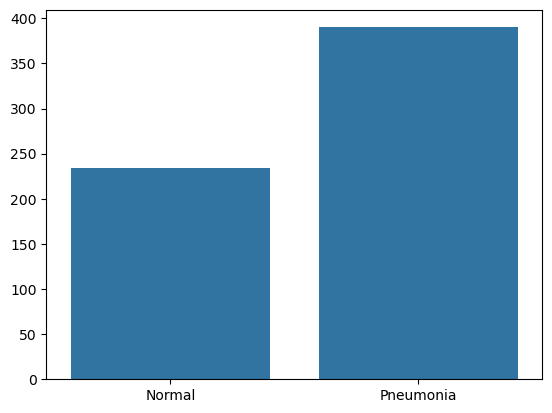

In [37]:
sns.barplot(data=data)

### The dataset is hugely imbalanced with targets being skewed towards pneumonia. Consider **stratified k fold for proprotional splitting** as well as **f1 score or roc-auc score for a more representative evaluation metric**.

### Separately, the validation dataset is too small by standards. We will **combine this validation dataset together with the train dataset** and perform a validation split from there.

### Data Manipulation of images and checking of the shape + Plotting of the resized image in the train array

In [38]:
# Set Data Path to data directory
DATA_PATH = r"..\data\raw"
#0 is Pneuomonia positive, 1 is normal
labels = ['PNEUMONIA', 'NORMAL']
#resize to standard image size
img_size = 224
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir,label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                #cv default flag is color image. Hence, specify grayscale
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr,(img_size,img_size))
                data.append([resized_arr,class_num])
            except Exception as e:
                print(e)
    return data

In [39]:
test = get_training_data(os.path.join(DATA_PATH,"test"))
test[0][0].shape, test[0][1]

((224, 224), 0)

In [40]:
test[0][0], test[0][0].ravel(),test[0][0].ravel().shape

(array([[18, 15, 17, ..., 91, 86, 87],
        [17, 15, 19, ..., 89, 95, 89],
        [18, 11, 20, ..., 90, 86, 78],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8),
 array([18, 15, 17, ...,  0,  0,  0], dtype=uint8),
 (50176,))

In [41]:
x_test = []
y_test = []
for image in test:
    x_test.append(image[0])
    y_test.append(image[1])

In [42]:
train = get_training_data(os.path.join(DATA_PATH,"train"))
val = get_training_data(os.path.join(DATA_PATH,"val"))

In [43]:
x_train = []
y_train = []

#load train into lists for storing
for image in train:
    x_train.append(image[0])
    y_train.append(image[1])

x_val = []
y_val = []

#load train into lists for storing
for image in val:
    x_val.append(image[0])
    y_val.append(image[1])


(-0.5, 223.5, 223.5, -0.5)

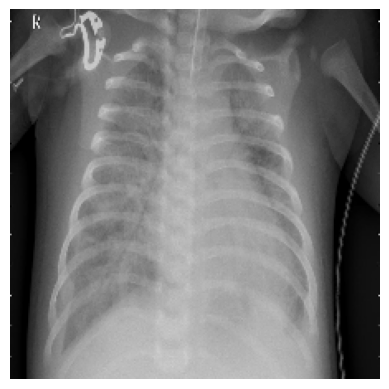

In [44]:
#Matplotlib applies a colormap by default so need to specify cmap
plt.imshow(x_train[0],cmap="gray")
plt.axis(False)